



ANN- Artificial Neural Networks 




https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

 watch this videos to get an overview of neural networks the 4th video in this playlist is optional

ANNs (Artificial Neural Network) is at the very core of Deep Learning an advanced version of Machine Learning techniques. ANNs are versatile, adaptive, and scalable, making them appropriate to tackle large datasets and highly complex Machine Learning tasks such as image classification (e.g., Google Images), speech recognition (e.g., Apple’s Siri), video recommendation (e.g., YouTube), or analyzing sentiments among customers (e.g. Twitter Sentiment Analyzer).

**What is Artificial Neural Network?**

Artificial Neural Network ANN is an efficient computing system whose central theme is borrowed from the analogy of biological neural networks. ANNs are also named as “artificial neural systems,” or “parallel distributed processing systems,” or “connectionist systems.” ANN acquires a large collection of units that are interconnected in some pattern to allow communication between the units. These units, also referred to as nodes or neurons, are simple processors which operate in parallel.

Every neuron is connected with other neuron through a connection link. Each connection link is associated with a weight that has information about the input signal. This is the most useful information for neurons to solve a particular problem because the weight usually excites or inhibits the signal that is being communicated. Each neuron has an internal state, which is called an activation signal. Output signals, which are produced after combining the input signals and activation rule, may be sent to other units.

ANN versus BNN
Before taking a look at the differences between Artificial Neural Network ANN and Biological Neural Network BNN, let us take a look at the similarities based on the terminology between these two.

Biological Neural Network BNN	Artificial Neural Network ANN
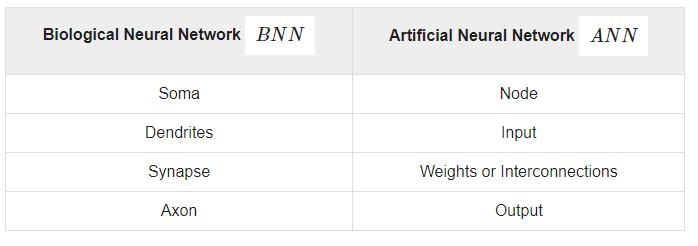


Artificial neural nework explained:
https://www.youtube.com/watch?v=hfK_dvC-avg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=3

It is recommended that you write code shown in the video for better retention. 

The Neural Network Architecture

Before jumping into the architecture, let’s take a look at some of the components of a Neural Network.

**The Input Layer** — Represents the input variables plus the bias term. Hence if there are n input variables, the size of the input layer is n + 1, where + 1 is the bias term

**The Hidden Layer/ Layers —** These signify neurons where all mathematical calculations are done. Note a given neural network can have more than one neuron in a hidden layer or multiple hidden layers as well

**The Activation Function** — Converts the output of a given layer before passing on the information to consecutive layers. Activation functions are mathematical equations that determine the output of a given neural network. The is a part of each neuron in the hidden layers and determines output relevant for prediction

**The Output Layer** — The final “output prediction” of the network

**Forward Propagation** — Calculating the output of each iteration from the input layer to the output layer

**Backward Propagation** — Calculates revised weights (w1, w2, w3, and b1) after each forward propagation by analyzing the derivative of the cost function used to optimize the model output

**Learning Rate —** Determined the percentage change attributed to each weight and bias term after every backward propagation, i.e. controls the speed at which the model learns information about the data

**ARCHITECTURE**

LAYERS IN NEURAL NETWORK:
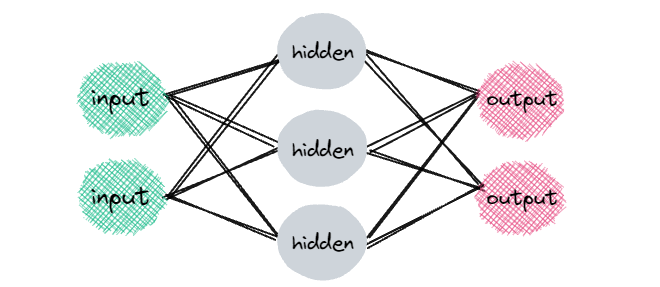


https://www.youtube.com/watch?v=FK77zZxaBoI&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=4

Activation Functions in a Neural Network:
https://www.youtube.com/watch?v=m0pIlLfpXWE&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=5

Go through this article for more info:
no need to byheart these activation functions just proof read this article(especially sigmoid and relu):

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

# **TRAINING OF NEURAL NETWORKS**
1)https://www.youtube.com/watch?v=sZAlS3_dnk0&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=6
continue to watch this playlist till  11th video predicting with neural network.




#### TASK


**USE** same data set (titanic) which you had preprocessed in the earlier task to create a neural network which predicts the survival rate. 

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [65]:
#import all the prerequisites like tensorflow and keras
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from sklearn.model_selection import train_test_split

In [70]:
#create a model using sequential
#add dense layers and activation function
model = Sequential([
    InputLayer(28),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [32]:
#import your dataset and write out the code for normalising and preprocessing the data. By now you should be familiar with this step. Remember, for the best accuracy and
#performance of the model, it is best if we provide the model with "clean" data 
titanic_data_df = pd.read_csv("/content/gdrive/My Drive/synapse_w3/titanic_data.csv")

def normalise(df,*col):
  for c in col:
    df[c] = df[c].apply(lambda x: (x - df[c].min())/(df[c].max() - df[c].min()))
  return df  

def titanic_preprocessing_pipeline(df):
  df["Title"] = df.apply(lambda row: re.search('(\w+)\.', row.Name).group(1), axis = 1)
  df.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True) 
  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Family_members'] = df.apply(lambda row: row['SibSp']+row['Parch'],axis = 1)
  df.drop(['SibSp','Parch','Name','Cabin'],axis = 1,inplace = True)
  df = normalise(df,'Age','Fare','Family_members')
  df = pd.get_dummies(df,columns=['Pclass','Sex','Title','Embarked'])
  return df

In [33]:
#create the features and labels of the dataset
df = titanic_preprocessing_pipeline(titanic_data_df)

In [34]:
y = df['Survived']
X = df.drop('Survived',axis=1)

In [45]:
#Split the dataset into train,test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
#compile your model using optimizers like "SGD","ADAM". Hint: model.compile()
#use model.fit to train 
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # ideal learning rate (same as default)
              metrics = ['mse'])
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1099 - mse: 0.1099
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1058 - mse: 0.1058
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 11/50
23/23 [==============================] - 0s 3ms/step - lo

In [74]:
#use model.predict to predict the survival rate on the test dataset and print the predictions
#Try to understand what does these numbers in predict means
# Model.predict passes the input vector through the trained(fit) model and returns the output tensor for each datapoint.
# the numbers in predict are tensors which predict probability(0,1) of survival of that person. if its close to 0, person dies. if its close to 1, person survives.  

def model_accuracy(y_pred,y_true):
  correct = 0
  for i,j in zip(y_pred,y_true):
    i = 0 if i < 0.5 else 1
    if i == j:
      correct += 1
  accuracy = correct/len(y_pred)
  return accuracy

In [75]:
y_pred = model.predict(X_test)
y_pred
model_accuracy(y_pred,y_test)

6/6 [==============================] - 0s 3ms/step


0.8100558659217877